In [26]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from pathlib import Path

dd = Path('/workspaces/marketing-data/data')

# Location of the league building. 
league_cv = (-117.24060311836597, 32.94814917805023)

In [17]:
schools = gpd.read_file(dd / 'SCHOOL.zip')


schools.gsOffered.unique()

def parse_grade(grade):
    if grade is None:
        return (None, None)  # Handle None values explicitly if needed
    # Split grades by '-' and process each part
    parts = grade.split('-')
    min_grade = parse_single_grade(parts[0])
    max_grade = parse_single_grade(parts[-1])  # Handles cases like 'K-K'
    return (min_grade, max_grade)

def parse_single_grade(grade):
    if grade == 'K':
        return 0
    elif grade == 'Adult':
        return 16
    elif grade == 'P':
        return -1
    else:
        return int(grade)
    

schools[['minGrade', 'maxGrade']] = schools['gsOffered'].apply(lambda x: parse_grade(x)).apply(pd.Series)



schools.head()

,district,schoolID,priv,shrtName,gsOffered,socType,charter,openDate,zip,city,addr,name,cdsCode,docType,geometry,minGrade,maxGrade
0,Sweetwater Union High,1,N,Bonita Vista Mid,7-8,Intermediate/Middle Schools (Public),N,1980-07-01,91910,Chula Vista,650 Otay Lakes Road,Bonita Vista Middle,37684116059745,High School District,POINT (6328948.010 1816631.100),7.0,8.0
1,Sweetwater Union High,2,N,Bonita Vista SH,9-12,High Schools (Public),N,1980-07-01,91913,Chula Vista,751 Otay Lakes Road,Bonita Vista Senior High,37684113730405,High School District,POINT (6331354.100 1815648.060),9.0,12.0
2,Chula Vista Elementary,3,N,Clear View,K-6,Elementary Schools (Public),N,1991-09-10,91910,Chula Vista,455 Windrose Way,Clear View,37680236109771,Elementary School District,POINT (6317094.090 1815461.560),0.0,6.0
3,Chula Vista Elementary,4,N,Tiffany,K-6,Elementary Schools (Public),N,1980-07-01,91913,Chula Vista,1691 Elmhurst Street,Tiffany (Burton C.) Elementary,37680236095020,Elementary School District,POINT (6333672.320 1815473.900),0.0,6.0
4,Chula Vista Elementary,5,N,McMillin,K-6,Elementary Schools (Public),N,2001-07-17,91913,Chula Vista,1201 Santa Cora Avenue,McMillin (Corky) Elementary,37680236118988,Elementary School District,POINT (6335643.680 1810957.240),0.0,6.0


<Axes: >

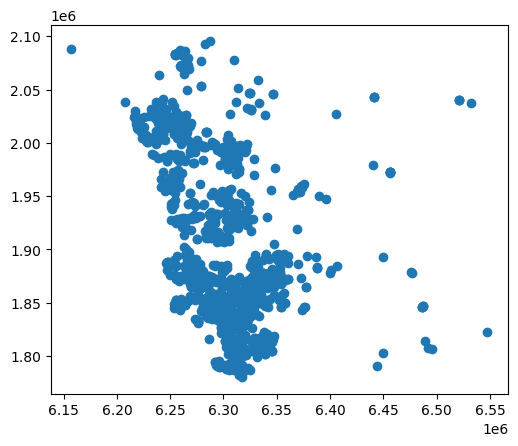

In [4]:
schools.plot()

In [5]:
schools.gsOffered.unique()

array(['7-8', '9-12', 'K-6', 'K-5', 'K-8', 'P-8', 'K-12', '7-12', '6-12',
       'P-6', '6-8', '1-5', 'K-4', '11-12', 'K-3', '3-5', '5-6', '7-9',
       '4-6', 'P-5', 'K-2', '10-12', 'P-12', 'P-K', 'K-1', '3-6', 'P',
       '4-8', '1-12', '5-8', 'Adult', '1-9', '1-6', 'K', '12', 'K-11',
       None, '9-Adult', '3-12', '9', '12-Adult', 'K-9', '8-12', '1-8',
       '3-9', 'K-K'], dtype=object)

In [6]:
#schools.gsOffered.unique() # How to get all of the grades

# Grade we are interested in. 
grades = ['7-8', '9-12', 'K-6', 'K-5', 'K-8', 'P-8', 'K-12', '7-12', '6-12',
       'P-6', '6-8', '11-12',  '5-6', '7-9', '4-6', '10-12', 
       '4-8', '1-12', '5-8',  '1-9',  '12', 'K-11', 
       '3-12', '9',  'K-9', '8-12', '1-8']

grades = ['7-8', '9-12',  'K-8', 'P-8', 'K-12', '7-12', '6-12',
       '6-8', '11-12',  '5-6', '7-9', '10-12', 
       '4-8', '1-12', '5-8',  '1-9',  '12', 'K-11', 
       '3-12', 'K-9', '8-12', '1-8']

#schools.socType.unique()
types = [
       'Intermediate/Middle Schools (Public)', 
       'High Schools (Public)',
       'Alternative Schools of Choice',
       'District Community Day Schools',
       'K-12 Schools (Public)',
       'Junior High Schools (Public)',
       'Private',
       'San Marcos Unified']

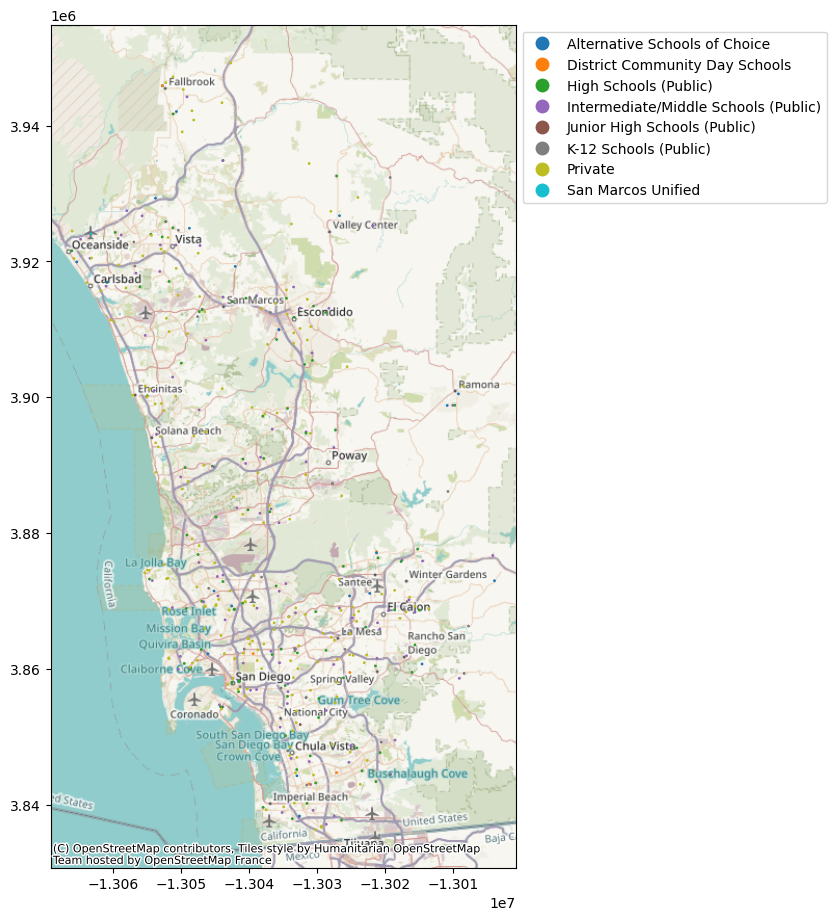

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6,15))  

t = schools.to_crs(epsg=3857) # Make it web mercator to match the basemap
t = t[t.gsOffered.isin(grades)]
t = t[t.socType.isin(types)]
t = t.cx[-1.307e7:-1.300e7, :]

t.plot(markersize=1, column='socType', legend=True, ax=ax)

cx.add_basemap(ax)
leg = ax.get_legend()                                                                         
leg.set_bbox_to_anchor((1, 1))                                                              
    
t.to_file(dd / "schools.geojson", driver='GeoJSON')

In [8]:
libr = gpd.read_file(dd / 'Library.zip')
libr.head()

,WEBSITE,ADDRESS,DISTRICT,NAME,TYPE,PHONE,ZIP,CITY,DATA_SRC,UPDATE_DAT,geometry
0,https://www.chulavistaca.gov/departments/library,365 F Street,Chula Vista,Civic Center Branch,Public,(619) 691-5069,91910,"Chula Vista, CA",Chula Vista,2023-07-25,POINT (6305123.540 1813996.900)
1,https://www.chulavistaca.gov/departments/library,389 Orange Avenue,Chula Vista,South Chula Vista Branch,Public,(619) 585-5755,91911,"Chula Vista, CA",Chula Vista,2023-07-25,POINT (6309570.940 1799657.160)
2,https://coronadolibrary.org/,640 Orange Avenue,Coronado,Coronado Public,Public,(619) 522-7390,92118,"Coronado, CA",City of Coronado website,2023-07-25,POINT (6276278.130 1832521.590)
3,https://www.escondido.org/library,239 South Kalmia Street,Escondido,Escondido Public,Public,(760) 839-4683,92025,"Escondido, CA",City of Escondido,2020-03-05,POINT (6307722.260 1988665.480)
4,https://www.nationalcityca.gov/government/library,1243 National City Blvd,National City,National City Public,Public,(619) 336-4241,91950,"National City, CA",National City Website,2023-07-25,POINT (6298815.066 1824885.622)


<Axes: >

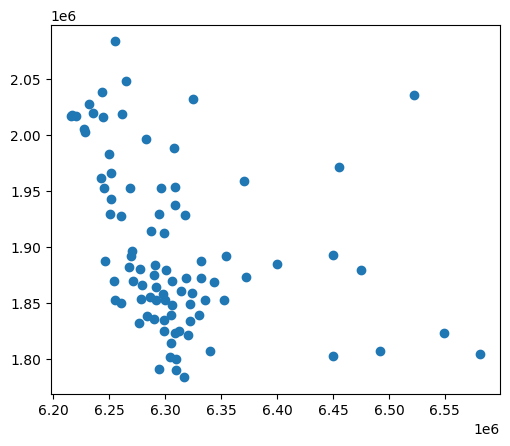

In [9]:
libr.plot()

In [11]:
schools.head().T

,0,1,2,3,4
district,Sweetwater Union High,Sweetwater Union High,Chula Vista Elementary,Chula Vista Elementary,Chula Vista Elementary
schoolID,1,2,3,4,5
priv,N,N,N,N,N
shrtName,Bonita Vista Mid,Bonita Vista SH,Clear View,Tiffany,McMillin
gsOffered,7-8,9-12,K-6,K-6,K-6
socType,Intermediate/Middle Schools (Public),High Schools (Public),Elementary Schools (Public),Elementary Schools (Public),Elementary Schools (Public)
charter,N,N,N,N,N
openDate,1980-07-01,1980-07-01,1991-09-10,1980-07-01,2001-07-17
zip,91910,91913,91910,91913,91913
city,Chula Vista,Chula Vista,Chula Vista,Chula Vista,Chula Vista


In [19]:
schools[schools.minGrade >= 7]

,district,schoolID,priv,shrtName,gsOffered,socType,charter,openDate,zip,city,addr,name,cdsCode,docType,geometry,minGrade,maxGrade
0,Sweetwater Union High,1,N,Bonita Vista Mid,7-8,Intermediate/Middle Schools (Public),N,1980-07-01,91910,Chula Vista,650 Otay Lakes Road,Bonita Vista Middle,37684116059745,High School District,POINT (6328948.010 1816631.100),7.0,8.0
1,Sweetwater Union High,2,N,Bonita Vista SH,9-12,High Schools (Public),N,1980-07-01,91913,Chula Vista,751 Otay Lakes Road,Bonita Vista Senior High,37684113730405,High School District,POINT (6331354.100 1815648.060),9.0,12.0
10,Sweetwater Union High,11,N,Eastlake Mid,7-8,Intermediate/Middle Schools (Public),N,2003-07-01,91914,Chula Vista,900 Duncan Ranch Road,Eastlake Middle,37684116120968,High School District,POINT (6346997.062 1818720.263),7.0,8.0
11,Sweetwater Union High,12,N,Eastlake,9-12,High Schools (Public),N,1992-09-08,91915,Chula Vista,1120 Eastlake Parkway,Eastlake High,37684113730843,High School District,POINT (6340904.610 1813717.650),9.0,12.0
12,Sweetwater Union High,13,N,Hilltop,9-12,High Schools (Public),N,1980-07-01,91910,Chula Vista,555 Claire Avenue,Hilltop Senior High,37684113732849,High School District,POINT (6312437.740 1812586.580),9.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,Oceanside Unified,1214,N,Oceanside Adult,12-Adult,Special Education Schools (Public),N,2019-08-20,92058,Oceanside,707 Carey Road,Oceanside Unified School District Adult Transi...,37735690140343,Unified School District,POINT (6221471.554 2021386.345),12.0,16.0
952,San Diego Unified,100339,Y,Cristo Rey,9,Private,N,2019-10-01,92113,San Diego,1228 S. 38Th St.,Cristo Rey San Diego High School,37683386136055,Unified School District,POINT (6296254.391 1833268.917),9.0,9.0
967,Oceanside Unified,100357,Y,CALI,8-12,Private,N,2019-10-01,92056,Oceanside,"3401 Piazza De Oro Way, Ste 300",California Accelerated Learning Institute,37735696158620,Unified School District,POINT (6236397.810 2011548.544),8.0,12.0
973,Sweetwater Union High,1218,N,Launch Academy,7-12,Alternative Schools of Choice,N,2021-07-21,92154,San Diego,2710 Iris Avenue,Launch Virtual Academy,37684110140939,High School District,POINT (6307859.422 1788265.363),7.0,12.0


In [30]:
from pyproj import Transformer
from shapely.geometry import Point

# Initialize transformer
# The direction is set to False, as it defaults to transforming from crs_from to crs_to
transformer = Transformer.from_crs("EPSG:4326", "EPSG:2230", always_xy=True)

# Transform coordinates
p = transformer.transform(league_cv[0], league_cv[1])
p = Point(*p)
print(p)

POINT (6257777.503282193 1926204.6931347626)


In [37]:
# Distance in meters from League classroom. 
schools['cv_dist'] = schools.geometry.distance(p)
schools['cv_miles'] = schools.cv_dist / 1600

<Axes: >

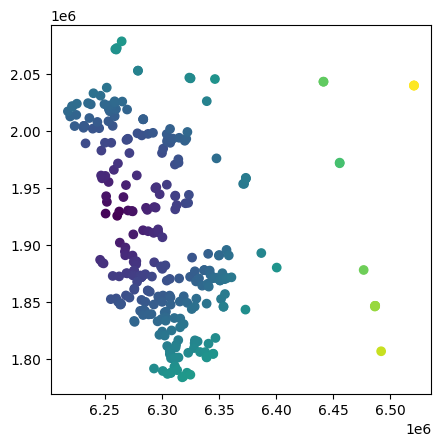

In [48]:
t = schools.sort_values('cv_dist', ascending = True)[['district','socType','name','minGrade', 'cv_dist', 'cv_miles', 'geometry']]

t = t[(t.minGrade >=6)]

t = gpd.GeoDataFrame(t, geometry='geometry')
t.to_file(dd / "target_schools.geojson", driver='GeoJSON')
t.plot(column='cv_miles')